In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

M = 10
mu = [ random.uniform(0,1) for i in range(M)]
B = np.resize([], (M, M))
for i in range(M):
    for j in range(i, M):
        if i == j:
            B[i][j] = 1
        else:
            B[i][j] = random.uniform(0, 1)
            B[j][i] = B[i][j]
sigma = np.diag([ random.uniform(0, 10) for i in range(M) ])
B = np.matmul(np.matmul(sigma, B), sigma)

rv = np.random.multivariate_normal(mu, B)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: covariance is not positive-semidefinite.


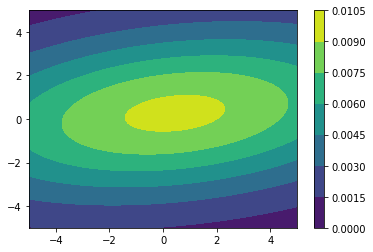

In [2]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-5:5:.01, -5:5:.01]
x1 = 0
x2 = 1
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
cut = multivariate_normal([ mu[x1], mu[x2] ], [ [B[x1][x1], B[x1][x2]], [ B[x2][x1], B[x2][x2]] ])
fig, ax = plt.subplots()
cax = plt.contourf(x, y, cut.pdf(pos))
cbar = fig.colorbar(cax, orientation='vertical')
plt.show()
#print(rv.rvs())

In [3]:
N = 1000 #todo input
samples = [ cut.rvs() for i in range(N) ]

In [4]:
def save_to_file(filename, arr):
    file = open(filename, 'w')
    for i in arr:
        for j in i:
            file.write(str(j) + ' ')
        file.write("\n")

def load_from_file(filename):
    data = open(filename, 'r').read().split("\n")
    ans = []
    for i in data:
        ans.append( np.array(list(map( lambda x : float(x), i.split()))))
    #print(data)
    return ans

save_to_file("lab3.log", samples)
loaded_samples = load_from_file("lab3.log")